In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import re

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving trainlDataset.csv to trainlDataset.csv


In [ ]:
import io
train = pd.read_csv(io.BytesIO(uploaded['trainlDataset.csv']))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving testDataset.csv to testDataset.csv


In [ ]:
import io
test = pd.read_csv(io.BytesIO(uploaded['testDataset.csv']))

In [ ]:
from sklearn.utils import shuffle

In [ ]:
train = shuffle(train)

In [ ]:
test = shuffle(test)

In [ ]:
train.Label.value_counts()

No Depression    1929
Depression       1615
Name: Label, dtype: int64

In [ ]:
test.Label.value_counts()

No Depression    827
Depression       693
Name: Label, dtype: int64

In [ ]:
train['Label_num'] = train.Label.map({'No Depression':0, 'Depression':1})

In [ ]:
test['Label_num'] = test.Label.map({'No Depression':0, 'Depression':1})

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

In [ ]:
vec = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii')

In [ ]:
trainFreq = vec.fit_transform(train['Tweets'])
print(trainFreq)

  (0, 1942)	1.0
  (1, 3693)	0.18826578481459808
  (1, 6861)	0.21107243324270744
  (1, 7276)	0.1309540093431715
  (1, 8002)	0.07925862215950093
  (1, 1184)	0.18826578481459808
  (1, 5133)	0.1042820918527075
  (1, 2791)	0.21107243324270744
  (1, 550)	0.05827638923525658
  (1, 533)	0.20098033054122744
  (1, 4882)	0.21107243324270744
  (1, 6628)	0.21107243324270744
  (1, 6864)	0.1765673061993902
  (1, 7633)	0.21107243324270744
  (1, 2051)	0.04656448911104985
  (1, 3180)	0.10514943354096225
  (1, 3629)	0.1736356643180888
  (1, 3297)	0.17101322129293947
  (1, 4932)	0.2504031903948981
  (1, 1135)	0.18826578481459808
  (1, 2350)	0.21107243324270744
  (1, 7272)	0.29617174335786756
  (1, 2125)	0.2682716119433492
  (1, 1250)	0.09222395275669334
  (1, 7314)	0.1578057844532754
  :	:
  (3542, 5346)	0.2978426818628047
  (3542, 2534)	0.27349772260234795
  (3542, 6993)	0.27349772260234795
  (3542, 3885)	0.28360179361385324
  (3542, 7560)	0.2091331513717758
  (3542, 5278)	0.27349772260234795
  (3542, 63

In [ ]:
testFreq = vec.transform(test['Tweets'])
print(testFreq)

  (0, 3736)	1.0
  (1, 5096)	0.23299049066469418
  (1, 3763)	0.5938923209026571
  (1, 3305)	0.20734659805966094
  (1, 2892)	0.1913551714221625
  (1, 2880)	0.44001351221052887
  (1, 1672)	0.5654962759805899
  (2, 8149)	0.15595282184345827
  (2, 8147)	0.1320177354839176
  (2, 8002)	0.14237404314075508
  (2, 7980)	0.09999153307910146
  (2, 7964)	0.19646686875038533
  (2, 7416)	0.1740814925956435
  (2, 7374)	0.04962025596037791
  (2, 7272)	0.10640399092744258
  (2, 6958)	0.14773218666054969
  (2, 6725)	0.1895770762696703
  (2, 6374)	0.1805127408935777
  (2, 5874)	0.13223660298652293
  (2, 5618)	0.16501715721955088
  (2, 4902)	0.16501715721955088
  (2, 4580)	0.5909287466421987
  (2, 4325)	0.15359744519026958
  (2, 3840)	0.0650518756373417
  (2, 3788)	0.16909302886429636
  :	:
  (1519, 4764)	0.21240003628068302
  (1519, 4186)	0.17472779762942717
  (1519, 4140)	0.15016122028787104
  (1519, 3840)	0.07288339401248795
  (1519, 3689)	0.21240003628068302
  (1519, 3534)	0.10311863028104051
  (1519, 

In [ ]:
x_train = trainFreq

In [ ]:
y_train = train['Label_num']

In [ ]:
x_test = testFreq

In [ ]:
y_test = test['Label_num']

In [ ]:
x_train.shape

(3544, 8175)

In [ ]:
y_train.shape

(3544,)

In [ ]:
x_test

<1520x8175 sparse matrix of type '<class 'numpy.float64'>'
	with 16750 stored elements in Compressed Sparse Row format>

In [ ]:
y_test

1145    0
1024    0
541     1
865     0
538     1
       ..
1356    0
1415    0
773     0
103     1
500     1
Name: Label_num, Length: 1520, dtype: int64

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict = rfc.predict(x_test)

In [ ]:
y_predict

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
y_test

1145    0
1024    0
541     1
865     0
538     1
       ..
1356    0
1415    0
773     0
103     1
500     1
Name: Label_num, Length: 1520, dtype: int64

In [ ]:
y_predict = pd.DataFrame(y_predict)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test, y_predict)

0.9743421052631579

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
parameter_range = [100, 300, 500, 750, 800, 1200]

In [ ]:
train_scoreNum, test_scoreNum = validation_curve( rfc, X = x_train, y = y_train, param_name = 'n_estimators', param_range = parameter_range, cv = 3)

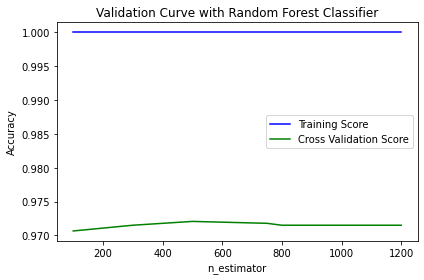

In [ ]:
mean_train_scoreNum = np.mean(train_scoreNum, axis = 1) 
std_train_scoreNum = np.std(train_scoreNum, axis = 1) 
   
mean_test_scoreNum = np.mean(test_scoreNum, axis = 1) 
std_test_scoreNum = np.std(test_scoreNum, axis = 1) 

plt.plot(parameter_range, mean_train_scoreNum,  
     label = "Training Score", color = 'b') 
plt.plot(parameter_range, mean_test_scoreNum, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with Random Forest Classifier") 
plt.xlabel("n_estimator") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [ int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 4, 5, 10]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 4, 5, 10], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 41.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 1000}

In [ ]:
rfcRandom = RandomForestClassifier(bootstrap = False,
 max_depth = None,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split = 15,
 n_estimators = 1000)

In [ ]:
rfcRandom.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predictR = rfcRandom.predict(x_test)

In [ ]:
y_predictR

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
y_predictR = pd.DataFrame(y_predictR)

In [ ]:
y_predictR

,0
0,0
1,0
2,1
3,0
4,1
...,...
1515,0
1516,0
1517,0
1518,1


In [ ]:
y_test

1145    0
1024    0
541     1
865     0
538     1
       ..
1356    0
1415    0
773     0
103     1
500     1
Name: Label_num, Length: 1520, dtype: int64

In [ ]:
metrics.accuracy_score(y_test, y_predictR)

0.9782894736842105

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * abs(np.mean(errors / test_labels))
    accuracy = metrics.accuracy_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    print('Exact Accuracy Value: ')
    
    return accuracy

In [ ]:
evaluate(rfcRandom, x_test, y_test)

Model Performance
Average Error: 0.0217 degrees.
Accuracy = 0.98%.
Exact Accuracy Value: 


0.9782894736842105